In [84]:
import pandas as pd 
import numpy as np 
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data/diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

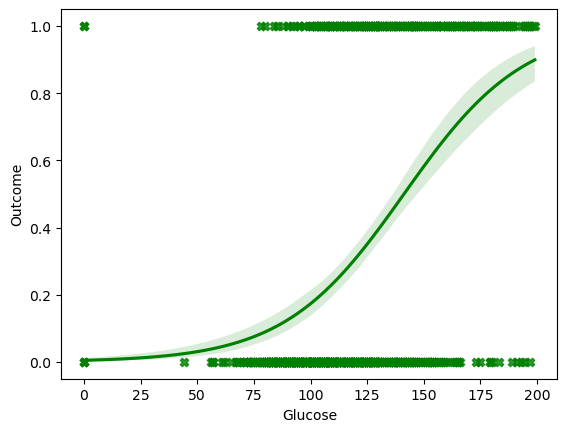

In [206]:
sns.regplot(x=df['Glucose'],y=df['Outcome'],logistic=True,marker='X',color='Green')
plt.show()

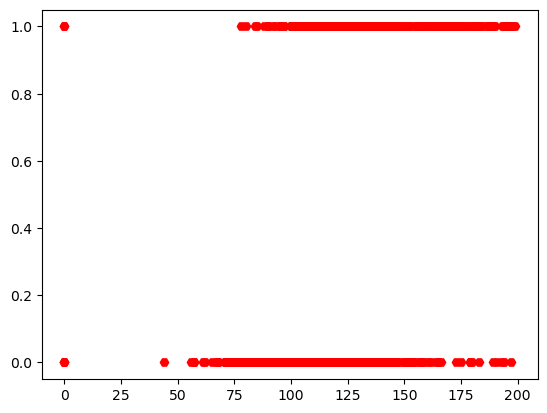

In [210]:
plt.scatter(df['Glucose'],df['Outcome'],color='r',marker='H')

In [45]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

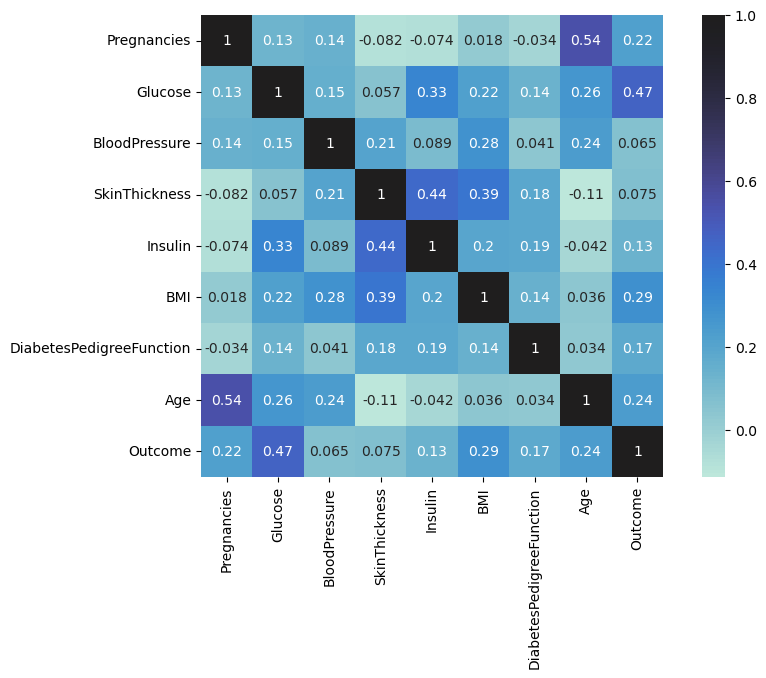

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True , square=True , center=True)
plt.show()

In [52]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [61]:
# so i take the most 4 affected features on  Outcome
features = df.corr()['Outcome'].sort_values(ascending=False).nlargest(5)[1:]
features = features.index.tolist()
features

['Glucose', 'BMI', 'Age', 'Pregnancies']

In [85]:
Input=[('scale',StandardScaler()),('model',LogisticRegression())]
pipe = Pipeline(Input)

In [88]:
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [89]:
X = df[features]
Y = df.iloc[:,-1].to_frame()

In [90]:
X

,Glucose,BMI,Age,Pregnancies
0,148,33.6,50,6
1,85,26.6,31,1
2,183,23.3,32,8
3,89,28.1,21,1
4,137,43.1,33,0
...,...,...,...,...
763,101,32.9,63,10
764,122,36.8,27,2
765,121,26.2,30,5
766,126,30.1,47,1


In [91]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [92]:
## split the data 
x_train, x_test , y_train , y_test = train_test_split(X,Y,test_size=.1,random_state=42)

In [93]:
# apply normalization and fit the model using the pipeline
pipe.fit(x_train,y_train)
pipe.score(x_train,y_train)

G:\conda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7727930535455861

In [115]:
log_pred = pipe.predict(x_test)
log_pred
y_nump = y_test['Outcome'].to_numpy()

In [124]:
y_nump[log_pred == y_nump].shape[0]/y_test.shape[0]*100

68.83116883116884

In [97]:
pipe.score(x_test,y_test)

0.6883116883116883

In [99]:
x_train.shape

(691, 4)

In [125]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

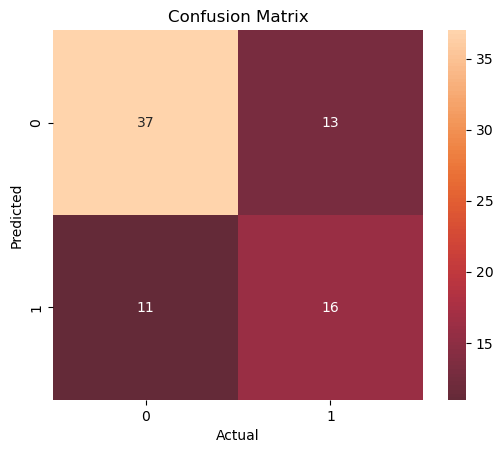

In [134]:
conf = confusion_matrix(y_test,log_pred)
sns.heatmap(conf,annot=True,square = True,center=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [137]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76        50
           1       0.55      0.59      0.57        27

    accuracy                           0.69        77
   macro avg       0.66      0.67      0.66        77
weighted avg       0.69      0.69      0.69        77



## Decision Tree 

In [187]:
Input2=[('scale',StandardScaler()),('model',DecisionTreeClassifier())]
pipe2 = Pipeline(Input2)

In [188]:
pipe2.fit(x_train,y_train)
pipe2.score(x_train,y_train)

1.0

In [189]:
pipe2.score(x_test,y_test)

0.7012987012987013

In [229]:
tree_pred = pipe2.predict(x_test)
tree_pred
y_nump = y_test['Outcome'].to_numpy()

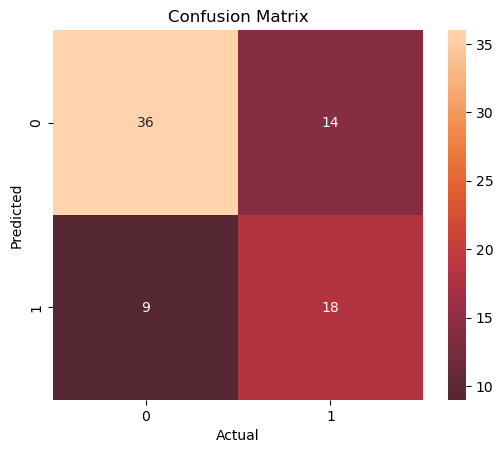

In [230]:
conf = confusion_matrix(y_test,tree_pred)
sns.heatmap(conf,annot=True,square = True,center=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

## NaiveBayes

In [196]:
Input3=[('scale',StandardScaler()),('model',GaussianNB())]
pipe3 = Pipeline(Input3)

In [197]:
pipe3.fit(x_train,y_train)
pipe3.score(x_train,y_train)

G:\conda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7467438494934877

In [198]:
pipe3.score(x_test,y_test)

0.6883116883116883

## Support Vector

In [226]:
Input4=[('scale',StandardScaler()),('model',SVC())]
pipe4 = Pipeline(Input4)

In [227]:
pipe4.fit(x_train,y_train)
pipe4.score(x_train,y_train)

G:\conda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7829232995658466

In [228]:
pipe4.score(x_test,y_test)

0.6883116883116883